In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# read the datset
df=pd.read_csv("mcdonalds.csv")

In [3]:
#Columns in Dataset
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
# top 3 rows of data
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
df_mac= df.iloc[:, 0:11].values

# Converting "Yes" to 1 and other values to 0
macd= (df_mac == "Yes").astype(int)

# Computing column means
col_means = macd.mean(axis=0)

print(col_means)

[0.55264969 0.90777701 0.09359945 0.86717137 0.5264969  0.90020647
 0.59876118 0.64418445 0.35788025 0.19889883 0.24294563]


In [6]:
from sklearn.decomposition import PCA
# Performing PCA
macd_pca = PCA()
macd_pca.fit(macd)

# Summary
summary = pd.DataFrame({
    'Standard deviation': macd_pca.explained_variance_,
    'Proportion of Variance': macd_pca.explained_variance_ratio_,
    'Cumulative Proportion': macd_pca.explained_variance_ratio_.cumsum()
})
summary.index += 1 
summary.columns.name = 'PC'
print(summary)

PC  Standard deviation  Proportion of Variance  Cumulative Proportion
1             0.573124                0.299447               0.299447
2             0.369002                0.192797               0.492244
3             0.254641                0.133045               0.625290
4             0.159040                0.083096               0.708386
5             0.113842                0.059481               0.767866
6             0.096270                0.050300               0.818166
7             0.083925                0.043849               0.862015
8             0.075692                0.039548               0.901563
9             0.070358                0.036761               0.938323
10            0.061922                0.032353               0.970677
11            0.056123                0.029323               1.000000


In [7]:
macd_pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [8]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(macd_pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8','PC9','PC10','PC11'],
                                    index = df.columns[:11])

In [9]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


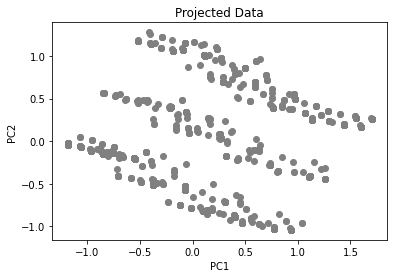

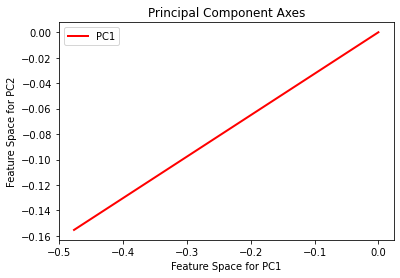

In [10]:
# Projecting data onto principal components
projected_data = macd_pca.transform(macd)
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data')
plt.show()
# Plotting principal component axes
plt.plot([0, macd_pca.components_[0, 0]], [0, macd_pca.components_[0, 1]], color='red', linewidth=2, label='PC1')
plt.xlabel('Feature Space for PC1')
plt.ylabel('Feature Space for PC2')
plt.title('Principal Component Axes')
plt.legend()
plt.show()

In [11]:
from sklearn.cluster import KMeans
seg={}
wss=[]
for i in range(2,9):
    km=KMeans(n_clusters=i,n_init=10,random_state=1)
    cluster_labels=km.fit_predict(macd)
    seg[i]=cluster_labels
    wss.append(km.inertia_)

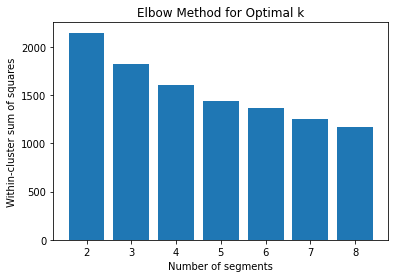

In [12]:
plt.bar(range(2,9),wss)
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
np.random.seed(1234)
k_range = range(2,9)
# Number of bootstrap samples
nboot =100
bootstrap_results =[]
for _ in range(nboot):
    bootstrap_sample_indices = np.random.choice(len(macd), size=len(macd), replace=True)
    bootstrap_sample = macd[bootstrap_sample_indices]
      # Dictionary to store clustering results for this bootstrap sample
    bootstrap_sample_results = {}
     # Perform k-means clustering for each k value
    for k in k_range:
        clusterer = KMeans(n_clusters=k, n_init=10, random_state=1234)
        cluster_labels = clusterer.fit_predict(bootstrap_sample)
        bootstrap_sample_results[k] = cluster_labels
    bootstrap_results.append(bootstrap_sample_results)

In [14]:
bootstrap_sample_results

{2: array([1, 1, 1, ..., 0, 1, 1]),
 3: array([0, 1, 0, ..., 2, 0, 0]),
 4: array([1, 0, 0, ..., 3, 1, 1]),
 5: array([0, 1, 4, ..., 3, 4, 0]),
 6: array([4, 0, 0, ..., 5, 0, 4]),
 7: array([4, 3, 3, ..., 5, 3, 4]),
 8: array([6, 2, 5, ..., 1, 5, 6])}

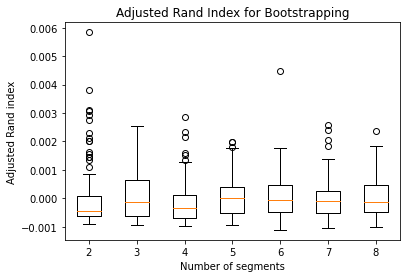

In [15]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
np.random.seed(1234)
k_range = range(2, 9)
# Number of repetitions
nrep = 10
nboot=100
ari_scores=[]
for k in k_range:
    k_ari_scores = []
    for _ in range(nboot):
        bootstrap_sample = resample(macd, replace=True)
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        cluster_labels = kmeans.fit_predict(bootstrap_sample)
        true_labels = np.random.randint(0, 2, size=len(cluster_labels))
        ari = adjusted_rand_score(true_labels, cluster_labels)
        k_ari_scores.append(ari)
    ari_scores.append(k_ari_scores)

plt.boxplot(ari_scores, labels=k_range)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index for Bootstrapping')
plt.show()

In [16]:
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(macd,seg[i])

means_lst = []
for label in range(2,9):
    means_lst.append(sample_silhouette_values[seg[i] == label])

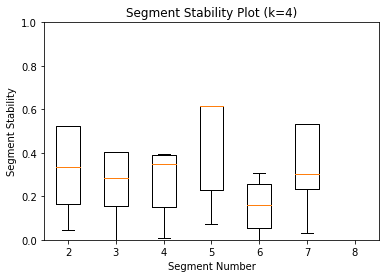

In [19]:
plt.boxplot(means_lst,labels=k_range)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability Plot (k=4)')
plt.ylim(0, 1)  # Set y-axis limit to 0 and 1
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability Plot (k=4)')
plt.ylim(0, 1)  # Set y-axis limit to 0 and 1
plt.show()

In [26]:
macd

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [27]:
from sklearn.mixture import GaussianMixture
X = macd 
np.random.seed(1234)
k_range = range(2, 9)  
nrep = 10 
cluster_results = {}
for k in k_range:
    best_model = None
    best_bic = np.inf
    for _ in range(nrep):
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
        gmm.fit(X)
        bic = gmm.bic(X)        
        if bic < best_bic:
            best_bic = bic
            best_model = gmm    
    cluster_results[k] = best_model
# Print or analyze clustering results as needed
for k, model in cluster_results.items():
    print(f"Model for k={k}:")
    print(model)

Model for k=2:
GaussianMixture(n_components=2, random_state=1234)
Model for k=3:
GaussianMixture(n_components=3, random_state=1234)
Model for k=4:
GaussianMixture(n_components=4, random_state=1234)
Model for k=5:
GaussianMixture(n_components=5, random_state=1234)
Model for k=6:
GaussianMixture(n_components=6, random_state=1234)
Model for k=7:
GaussianMixture(n_components=7, random_state=1234)
Model for k=8:
GaussianMixture(n_components=8, random_state=1234)


In [48]:
aic_values=[]
bic_values=[]
for k, model in cluster_results.items():
    print(f"Model for k={k}:")
    print(model)    
    # AIC and BIC scores
    aic = model.aic(X)
    aic_values.append(aic)
    bic = model.bic(X)
    bic_values.append(bic)
    print(f"AIC: {aic}, BIC: {bic}")

Model for k=2:
GaussianMixture(n_components=2, random_state=1234)
AIC: -21985.64184966373, BIC: -21167.02707181034
Model for k=3:
GaussianMixture(n_components=3, random_state=1234)
AIC: -12000.324363706544, BIC: -10769.76150409467
Model for k=4:
GaussianMixture(n_components=4, random_state=1234)
AIC: -13534.446898771654, BIC: -11891.935957401296
Model for k=5:
GaussianMixture(n_components=5, random_state=1234)
AIC: -27625.162786695688, BIC: -25570.70376356685
Model for k=6:
GaussianMixture(n_components=6, random_state=1234)
AIC: -28527.657833126996, BIC: -26061.250728239673
Model for k=7:
GaussianMixture(n_components=7, random_state=1234)
AIC: -32798.50181245358, BIC: -29920.146625807774
Model for k=8:
GaussianMixture(n_components=8, random_state=1234)
AIC: -46876.428553223916, BIC: -43586.12528481963


In [49]:
log_likelihoods = []
for k, model in cluster_results.items():
    log_likelihood = model.score(X)
    log_likelihoods.append(log_likelihood)
    print(f"Log-likelihood for k={k}: {log_likelihood}")

Log-likelihood for k=2: 7.672278681921449
Log-likelihood for k=3: 4.289856973057999
Log-likelihood for k=4: 4.871454541903528
Log-likelihood for k=5: 9.773972053233203
Log-likelihood for k=6: 10.138216735418787
Log-likelihood for k=7: 11.661562908621327
Log-likelihood for k=8: 16.559679474612498


In [50]:
icl_values = []
for k, model in cluster_results.items():
    log_likelihood = model.score(X)
    bic = model.bic(X)
    icl = log_likelihood - (0.5 * bic)  # Calculate ICL
    icl_values.append(icl)
    print(f"ICL for k={k}: {icl}")

ICL for k=2: 10591.18581458709
ICL for k=3: 5389.1706090203925
ICL for k=4: 5950.839433242551
ICL for k=5: 12795.125853836658
ICL for k=6: 13040.763580855255
ICL for k=7: 14971.734875812508
ICL for k=8: 21809.622321884428


In [51]:
k_values = range(2,9)
results_macd = pd.DataFrame({
    'k': k_values,
    'AIC': aic_values,
    'BIC': bic_values,
    'Log Likelihood': log_likelihoods,
    'ICL': icl_values})
print(results_macd)

   k           AIC           BIC  Log Likelihood           ICL
0  2 -21985.641850 -21167.027072        7.672279  10591.185815
1  3 -12000.324364 -10769.761504        4.289857   5389.170609
2  4 -13534.446899 -11891.935957        4.871455   5950.839433
3  5 -27625.162787 -25570.703764        9.773972  12795.125854
4  6 -28527.657833 -26061.250728       10.138217  13040.763581
5  7 -32798.501812 -29920.146626       11.661563  14971.734876
6  8 -46876.428553 -43586.125285       16.559679  21809.622322


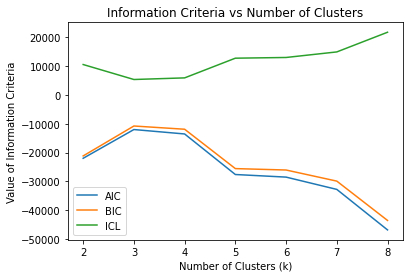

In [52]:
plt.plot(k_values, aic_values, label='AIC')
plt.plot(k_values, bic_values, label='BIC')
plt.plot(k_values, icl_values, label='ICL')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria vs Number of Clusters')
plt.legend()
plt.show()

In [58]:
df["Like"].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [63]:
from mixmod import MixtureModel as MM

In [85]:
import patsy
print(df.columns)
columns = "+".join(df.columns[0:11])
formula_str = "Like_n ~ " + columns
f = patsy.ModelDesc.from_formula(formula_str)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
